<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Weather_Prediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load Our Dataset
path = "/content/drive/MyDrive/datasets/gq_weather.csv"

df = pd.read_csv(path)
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Gqeberha,2025-01-01,78.8,57.0,69.9,78.8,57.0,69.9,59.3,71.4,...,32.6,10,10,2025-01-01T05:10:20,2025-01-01T19:32:06,0.05,Clear,Clear conditions throughout the day.,clear-day,"FAPE,68835099999,68837099999,68841099999,68839..."
1,Gqeberha,2025-01-02,78.8,62.9,72.5,78.8,62.9,72.5,62.0,71.6,...,32.5,10,10,2025-01-02T05:11:06,2025-01-02T19:32:15,0.09,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"FAPE,68835099999,68837099999,68939099999,68841..."
2,Gqeberha,2025-01-03,82.4,70.3,77.0,88.3,70.3,78.3,71.4,83.4,...,31.0,10,15,2025-01-03T05:11:53,2025-01-03T19:32:23,0.12,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"FAPE,68835099999,68837099999,68841099999,68839..."
3,Gqeberha,2025-01-04,82.4,71.6,75.6,86.2,71.6,75.8,68.3,79.2,...,28.5,10,15,2025-01-04T05:12:41,2025-01-04T19:32:29,0.16,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"FAPE,68835099999,68837099999,68939099999,68841..."
4,Gqeberha,2025-01-05,76.0,68.0,72.3,76.0,68.0,72.3,61.6,69.1,...,18.7,8,10,2025-01-05T05:13:30,2025-01-05T19:32:32,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"FAPE,68835099999,68837099999,68841099999,68839..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              247 non-null    object 
 1   datetime          247 non-null    object 
 2   tempmax           247 non-null    float64
 3   tempmin           247 non-null    float64
 4   temp              247 non-null    float64
 5   feelslikemax      247 non-null    float64
 6   feelslikemin      247 non-null    float64
 7   feelslike         247 non-null    float64
 8   dew               247 non-null    float64
 9   humidity          247 non-null    float64
 10  precip            247 non-null    float64
 11  precipprob        247 non-null    int64  
 12  precipcover       247 non-null    float64
 13  preciptype        145 non-null    object 
 14  snow              247 non-null    int64  
 15  snowdepth         247 non-null    int64  
 16  windgust          247 non-null    float64
 1

In [ ]:
df.shape

(247, 33)

In [ ]:
df["conditions"].value_counts()

,count
conditions,
Partially cloudy,94
"Rain, Partially cloudy",89
Clear,57
"Rain, Overcast",3
Rain,2
Overcast,2


In [ ]:
df = df.drop(["stations", "icon", "description", "sunset", "sunrise", "datetime", "name", "preciptype"], axis=1)

In [ ]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions
0,78.8,57.0,69.9,78.8,57.0,69.9,59.3,71.4,0.0,0,...,169.4,1012.9,3.6,8.4,379.1,32.6,10,10,0.05,Clear
1,78.8,62.9,72.5,78.8,62.9,72.5,62.0,71.6,0.0,0,...,189.6,1014.5,27.5,8.4,374.4,32.5,10,10,0.09,Partially cloudy
2,82.4,70.3,77.0,88.3,70.3,78.3,71.4,83.4,0.0,0,...,92.2,1010.4,64.0,7.7,362.5,31.0,10,15,0.12,Partially cloudy
3,82.4,71.6,75.6,86.2,71.6,75.8,68.3,79.2,0.0,0,...,230.3,1008.6,55.1,7.7,329.4,28.5,10,15,0.16,Partially cloudy
4,76.0,68.0,72.3,76.0,68.0,72.3,61.6,69.1,0.0,0,...,237.1,1008.9,57.2,8.4,215.8,18.7,8,10,0.20,Partially cloudy


In [ ]:
#Do some Preprocessing on our conditions column
encoder = LabelEncoder()

df["conditions"] = encoder.fit_transform(df["conditions"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           247 non-null    float64
 1   tempmin           247 non-null    float64
 2   temp              247 non-null    float64
 3   feelslikemax      247 non-null    float64
 4   feelslikemin      247 non-null    float64
 5   feelslike         247 non-null    float64
 6   dew               247 non-null    float64
 7   humidity          247 non-null    float64
 8   precip            247 non-null    float64
 9   precipprob        247 non-null    int64  
 10  precipcover       247 non-null    float64
 11  snow              247 non-null    int64  
 12  snowdepth         247 non-null    int64  
 13  windgust          247 non-null    float64
 14  windspeed         247 non-null    float64
 15  winddir           247 non-null    float64
 16  sealevelpressure  247 non-null    float64
 1

<Axes: >

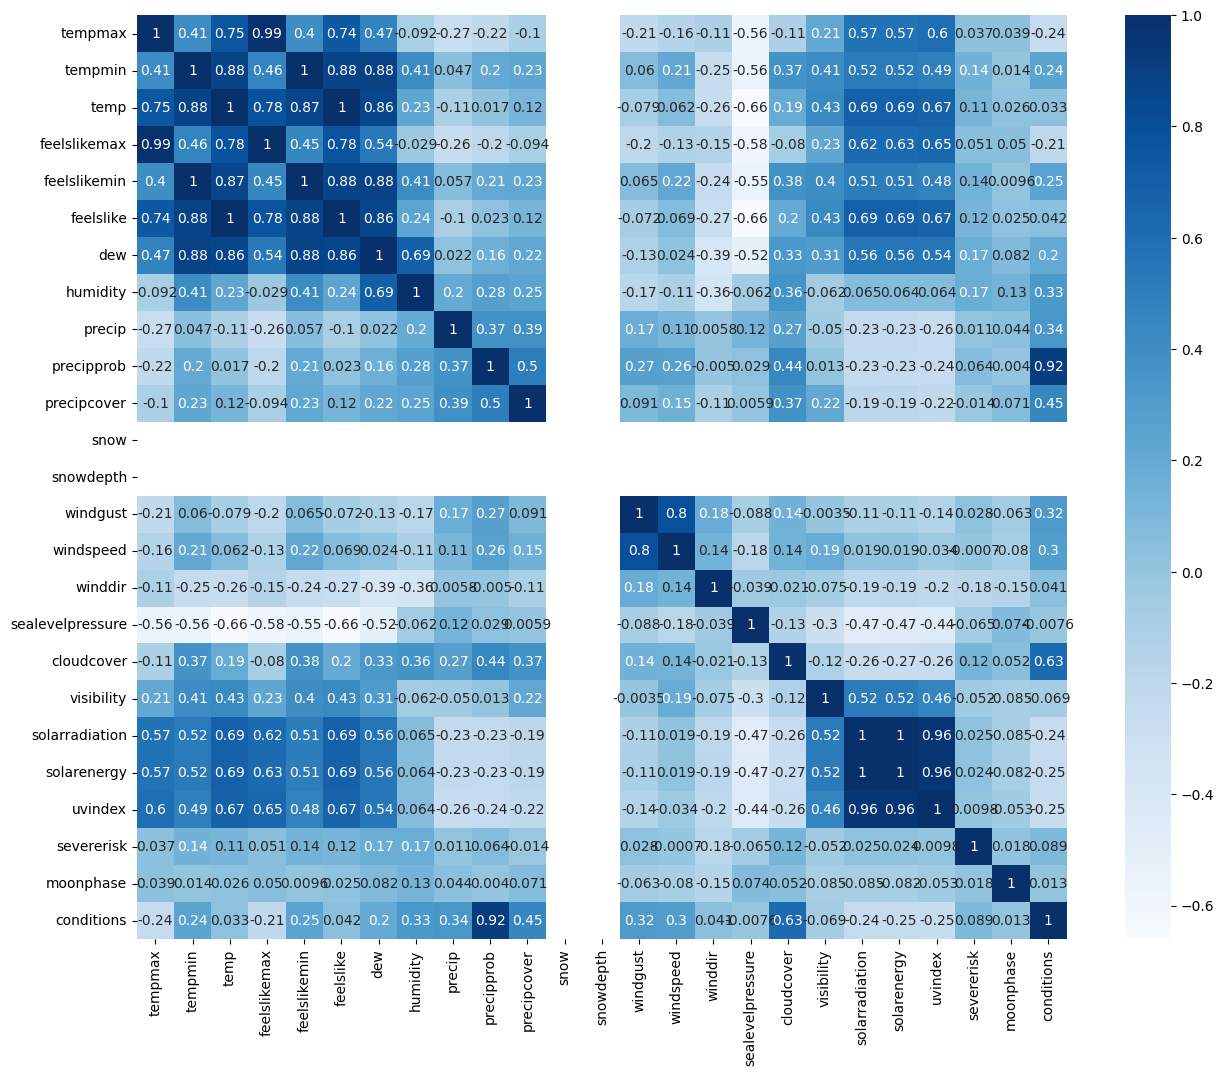

In [ ]:
#Correlation Matrix
corr = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap="Blues")

In [ ]:
#Split our Data
X = df.drop("temp", axis=1)
Y = df["temp"]

In [ ]:
#Let's do some standard scaling on our Data
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=20
)

In [ ]:
#Model Function
def model_function(model):
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    #Score
    score = r2_score(y_test, pred)
    error = mean_squared_error(y_test, pred)

    print("Score: ", score)
    print("Error: ", error)

In [ ]:
linear = LinearRegression()
model_function(linear)

Score:  0.9997183939108842
Error:  0.009671780632489102


In [ ]:
forest = RandomForestRegressor()
model_function(forest)

Score:  0.998408229336125
Error:  0.054669473684209026


In [ ]:
ridge = Ridge()
model_function(ridge)

Score:  0.9987546594772583
Error:  0.04277130649598162


In [ ]:
import joblib
#Save our Model

joblib.dump(linear, "weather_prediction.joblib")

['weather_prediction.joblib']